In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import pandas as pd

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.grid'] = True
sns.set()

#### Генерируем данные

In [88]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [89]:
# n = 6020
# t = 6000
# arparams = np.array([0.4])
# maparams = np.array([0])
# arparams = np.r_[1, -arparams]
# maparams = np.r_[1, maparams]
# # np.random.seed(2014)

# arparams = np.r_[1, -ar_params]
# maparams = np.r_[1, ma_params]
# y = arma_generate_sample(arparams, maparams, n)

# model = ARIMA(y[:t], order=(1,0,1), trend='n').fit()
# ar, ma = model.arparams, model.maparams
# ar, ma
# forecast = copy.copy(y)

In [115]:
# np.random.seed(7)
# def generate_arma(ar_params, ma_params, sigma, n):
#     p = len(ar_params)
#     q = len(ma_params)
    
#     epsilon = np.random.normal(0, sigma, n + max(p, q))
#     series = np.zeros(n)
    
#     for i in range(max(p, q), n):
#         ar_term = sum([ar_params[j] * series[i-j-1] for j in range(p)])
#         ma_term = sum([ma_params[j] * epsilon[i-j-1] for j in range(q)])
#         series[i] = ar_term + ma_term + epsilon[i]
        
#     return series, epsilon

# def forecast_next(ar_params, ma_params, true_values, predicted_values):
#     ar_component = 0
#     for i in range(1, len(ar_params) + 1):
#         if len(predicted_values) - i >= 0:
#             ar_component += ar_params[i - 1] * predicted_values[-i]

#     ma_component = 0
#     for i in range(1, len(ma_params) + 1):
#         if len(predicted_values) - i >= 0:
#             ma_component += ma_params[i - 1] * (true_values[-i] - predicted_values[-i])

#     forecasted_value = ar_component - ma_component
#     return forecasted_value

# def get_predicted(arma_series, ar_params, ma_params, m, n):
#     true_values = list(arma_series[:m])
#     predicted_values = list(arma_series[:m])
#     for i in range(m, n):
#         forecast = forecast_next(ar_params, ma_params, true_values, predicted_values)
#         predicted_values.append(forecast)
#         true_values.append(arma_series[i])
    
#     predicted_values = np.array(predicted_values)
#     return predicted_values

In [116]:
np.random.seed(7)
n = 3000
m = 2200

ar_params = np.array([0.5])
ma_params =  np.array([-0.2])

bad_ar_params = [-0.4]
bad_ma_params = [0.5]
# ar_roots = np.roots(np.r_[1, -np.array(ar_params)])
# print(np.all(np.abs(ar_roots) > 1))
arma_series, err = generate_arma(ar_params, ma_params, 1, n)

# arparams = np.r_[1, -ar_params]
# maparams = np.r_[1, ma_params]
# y = arma_generate_sample(arparams, maparams, n)
y = arma_series


predicted_values = get_predicted(y, ar_params, ma_params, m, n)
badly_predicted_values = get_predicted(y, bad_ar_params, bad_ma_params, m, n)

In [117]:
y

array([ 0.        , -0.80404251, -0.27601362, ..., -1.01041053,
       -1.18247992, -0.25130636])

In [118]:
arma_series

array([ 0.        , -0.80404251, -0.27601362, ..., -1.01041053,
       -1.18247992, -0.25130636])

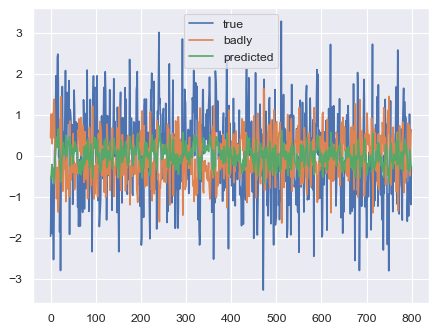

In [119]:
plt.plot(arma_series[m-n:], label='true')
plt.plot(badly_predicted_values[m-n:], label='badly')
plt.plot(predicted_values[m-n:], label='predicted')
plt.legend()

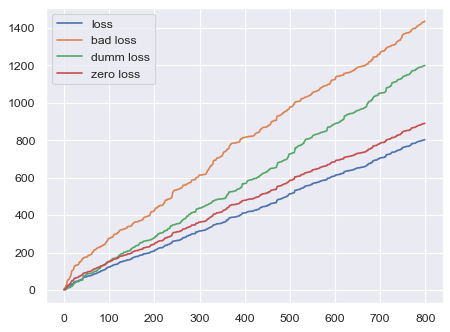

In [120]:
loss_f = lambda x, y: np.square(x - y)
losses = loss_f(arma_series, predicted_values)
bad_losses = loss_f(arma_series, badly_predicted_values)

dumm_values = np.roll(arma_series, 1)
dumm_losses = loss_f(arma_series, dumm_values)
zero_losses = loss_f(arma_series, 0)

plt.plot(losses[m-n:].cumsum(), label='loss')
plt.plot(bad_losses[m-n:].cumsum(), label='bad loss')
plt.plot(dumm_losses[m-n:].cumsum(), label='dumm loss')
plt.plot(zero_losses[m-n:].cumsum(), label='zero loss')

plt.legend()
plt.show()

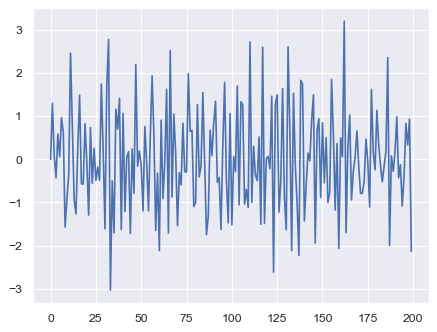

In [121]:
np.random.seed(32)
n = 200
ar_params = np.array([0.3])
ma_params =  np.array([-0.9])
y, err = generate_arma(ar_params, ma_params, 1, n)
# y = arma_generate_sample(arparams, maparams, n)
plt.plot(y)

In [122]:
adfuller(y)

(-10.127636278791345,
 9.092646664852032e-18,
 5,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 540.0005573655011)

In [56]:
model = ARIMA(y, order=(1, 0, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -284.750
Date:                Sat, 27 Apr 2024   AIC                            577.500
Time:                        12:13:28   BIC                            590.693
Sample:                             0   HQIC                           582.839
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.009      1.195      0.232      -0.007       0.028
ar.L1          0.3416      0.087      3.925      0.000       0.171       0.512
ma.L1         -0.9254      0.034    -27.159      0.0

In [62]:
results.param_terms

['exog', 'ar', 'ma', 'variance']

In [63]:
results.params

array([ 0.01050471,  0.34163501, -0.92544863,  1.00309623])

In [70]:
dct = {term: val for term, val in zip(results.param_terms, results.params)}
# pd.DataFrame(dct)
dct

{'exog': 0.010504710049842736,
 'ar': 0.3416350134517181,
 'ma': -0.9254486274929179,
 'variance': 1.0030962284263345}

In [ ]:
for 

In [76]:
model = ARIMA(y[:100], order=(1, 0, 1))

In [77]:
results = model.fit()
forecasted = results.forecast(steps=100)

In [79]:
values = np.r_[y[:100], forecasted]

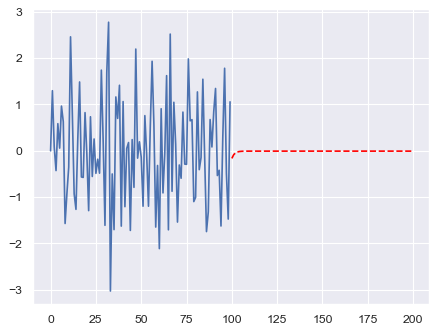

In [80]:
grid = np.arange(200)
fgrid = np.arange(100, 200)
plt.plot(grid[:100], y[:100])
plt.plot(grid[100:], forecasted, linestyle='--', color='red')

In [101]:
forecasted = np.zeros(y.size)
for i in range(50, y.size):
    model = ARIMA(y[:i], order=(1, 0, 1)).fit()
    forecasted[i] = model.forecast()[0]

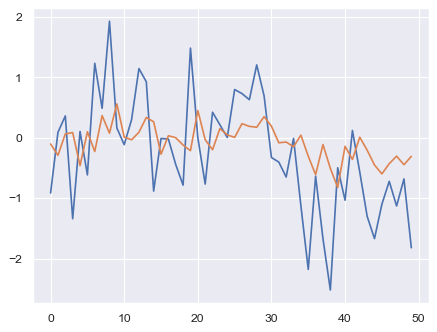

In [102]:
plt.plot(y[100:150])
plt.plot(forecasted[100:150])
# plt.plot(y)
# plt.plot(forecasted)

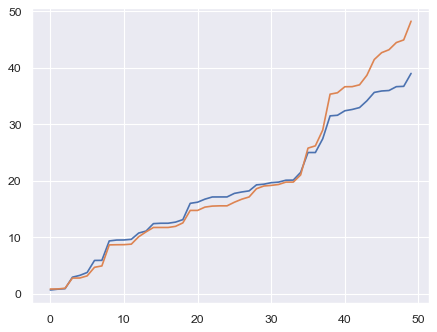

In [103]:
plt.plot(np.square(y[100:150]-forecasted[100:150]).cumsum())
plt.plot(np.square(y[100:150]).cumsum())

In [164]:
n = 200
m = 100
d = 10
signals = np.random.randn(n, d)
weights = np.random.randint(-10, 10, size=d)
weights

array([ 3,  3, -4,  6, -2, -7,  5, -1,  5,  8])

In [165]:
ar_params = np.array([0.8])
ma_params =  np.array([-0.3])

arma_series, err = generate_arma(ar_params, ma_params, 1, n)

In [166]:
responses = signals @ weights + arma_series
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(signals, responses)
error = responses - linreg.predict(signals)

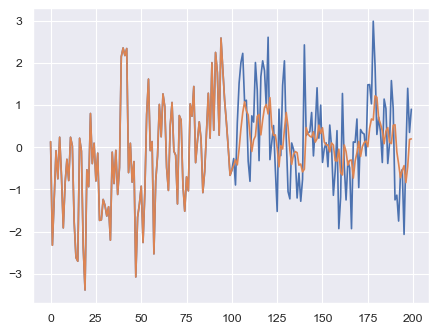

In [173]:
plt.plot(error)
# plt.plot(arma_series)
plt.plot(predicted_values)

In [184]:
preverr = np.roll(error, 1)

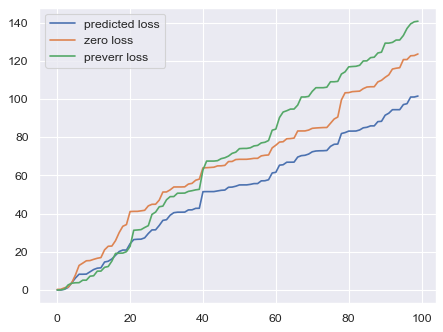

In [186]:
plt.plot(np.square(error - predicted_values)[100:].cumsum(), label='predicted loss')
plt.plot(np.square(error)[100:].cumsum(), label='zero loss')
plt.plot(np.square(error - preverr)[100:].cumsum(), label='preverr loss')
plt.legend()
plt.show()

In [172]:
m = 100
predicted_values = get_predicted(error, ar_params, ma_params, m, n)

In [187]:
def generate_linear_time_series(weights, n):
    dim = len(weights)
    signals = np.random.normal(0, 1, size=(n, dim))
    responses = signals @ weights
    return signals, responses

In [192]:
def get(weights, n):
    np.random.seed(3)
    return generate_linear_time_series(weights, n)

In [194]:
get(np.array([2, -3]), 5)

(array([[ 1.78862847,  0.43650985],
        [ 0.09649747, -1.8634927 ],
        [-0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068],
        [-0.04381817, -0.47721803]]),
 array([2.2677274 , 5.78347305, 0.50950053, 1.71551907, 1.34401775]))

In [193]:
get(np.array([2, -3]), 5)

(array([[ 1.78862847,  0.43650985],
        [ 0.09649747, -1.8634927 ],
        [-0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068],
        [-0.04381817, -0.47721803]]),
 array([2.2677274 , 5.78347305, 0.50950053, 1.71551907, 1.34401775]))

In [197]:
model = LinearRegression()
model.fit(np.array([5, 6]).reshape(1, -1), [3])

LinearRegression()

In [201]:
model.predict(np.array([5, 6]).reshape(1, -1))

array([3.])

In [200]:
mine = np.array([3, 4])

In [203]:
mine[1] = model.predict(np.array([5, 6]).reshape(1, -1))

/var/folders/nw/gt7hd8590djdtx4cyxcdfyym0000gn/T/ipykernel_2425/1066008460.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mine[1] = model.predict(np.array([5, 6]).reshape(1, -1))


In [204]:
mine

array([3, 3])